In [61]:
import distance as ds
import numpy as np
import matplotlib.pyplot as plt
import direction_of_motion as dm

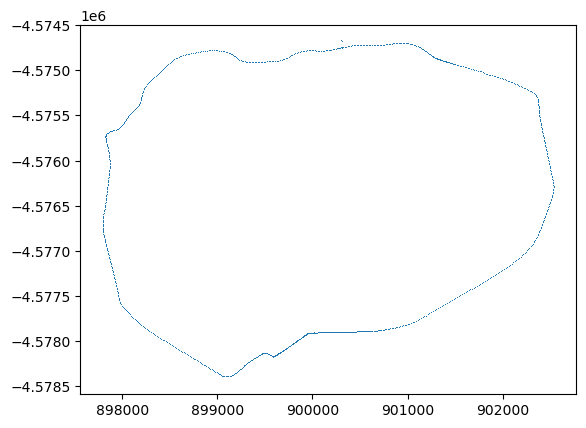

In [62]:
t, lat, lon, alt, alt84, speed, direction, distance, sigma_horz_meters, sigma_alt_meters, satellites = np.loadtxt(
    '/workspaces/CP1-24-midterm/iglesias-cardinale/data/ic001_gps_circle_run001.csv' ,
    skiprows=1,
    delimiter = ',',
    unpack=True)

#Convert latitude and longitude from degrees to radians
lat_rad = lat*np.pi/180
lon_rad = lon*np.pi/180

#Calculate the x, y and z positions
x,y,z = ds.gps_wgs84(lat_rad, lon_rad, alt84)

#Plot the data
plt.plot(x,y, ',')

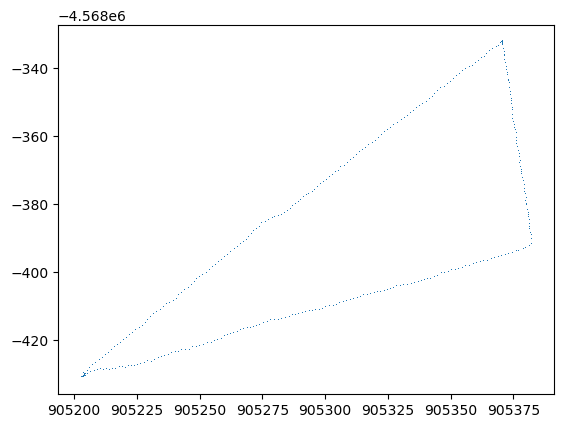

In [63]:
t, lat, lon, alt, alt84, speed, direction, distance, sigma_horz_meters, sigma_alt_meters, satellites = np.loadtxt(
    '/workspaces/CP1-24-midterm/iglesias-cardinale/data/ic002_gps_right_triangle_run001.csv' ,
    skiprows=1,
    delimiter = ',',
    unpack=True)

#Convert latitude and longitude from degrees to radians
lat_rad = lat*np.pi/180
lon_rad = lon*np.pi/180

#Calculate the x, y and z positions
x,y,z = ds.gps_wgs84(lat_rad, lon_rad, alt84)

#Plot the data
plt.plot(x,y, ',')

# Finding Velocity

Given acceleration $a(t)$ we must find the  direction of motion, or the velocity, $v(t)$. Assuming we begin at time $t_0$ with velocity $v_0$ we have 
$$ v(t) = v_0 + \int_{t_0}^t a(t')dt' $$

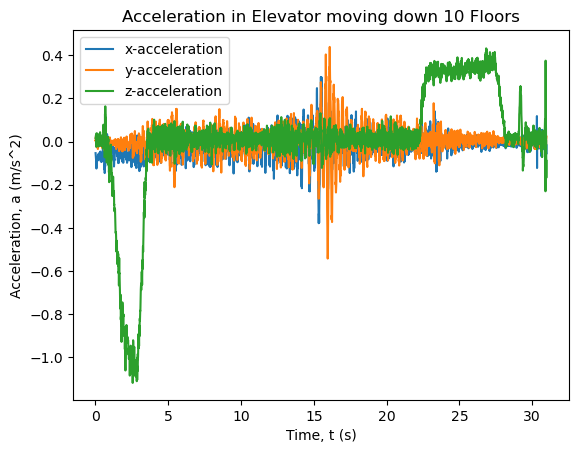

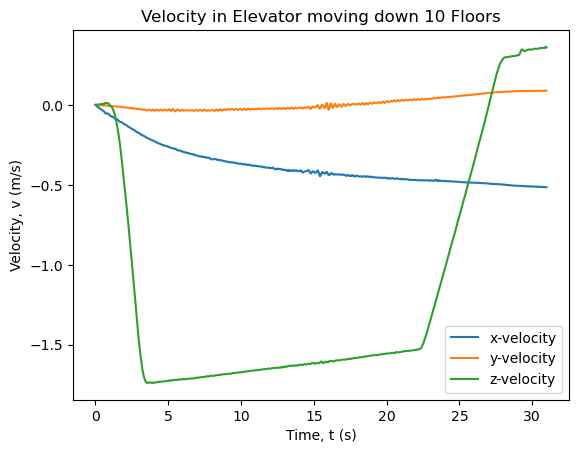

In [64]:
# Finding and plotting direction of motion (velocity) from acceleration data

#First extract the acceleration data:

# Time (seconds), x-accel (m/s^2), y-accel (m/s^2), z-accel (m/s^2), absolute accel (m/s^2)
t, a_x, a_y, a_z, a = np.loadtxt(
    '/workspaces/CP1-24-midterm/iglesias-cardinale/data/ic003_accel_elevator_down.csv' ,
    skiprows=1,
    delimiter = ',',
    unpack=True)

plt.plot(t, a_x, label = 'x-acceleration')
plt.plot(t, a_y, label = 'y-acceleration')
plt.plot(t, a_z, label = 'z-acceleration')
plt.xlabel('Time, t (s)')
plt.ylabel('Acceleration, a (m/s^2)')
plt.title('Acceleration in Elevator moving down 10 Floors')
plt.legend()
plt.show()

# Example usage
v_x = dm.velocity(t, a_x, 0)
v_y = dm.velocity(t, a_y, 0)
v_z = dm.velocity(t, a_z, 0)

# Plot the velocity components
plt.plot(t, v_x, label = 'x-velocity')
plt.plot(t, v_y, label = 'y-velocity')
plt.plot(t, v_z, label = 'z-velocity')
plt.xlabel('Time, t (s)')
plt.ylabel('Velocity, v (m/s)')
plt.title('Velocity in Elevator moving down 10 Floors')
plt.legend()
plt.show()


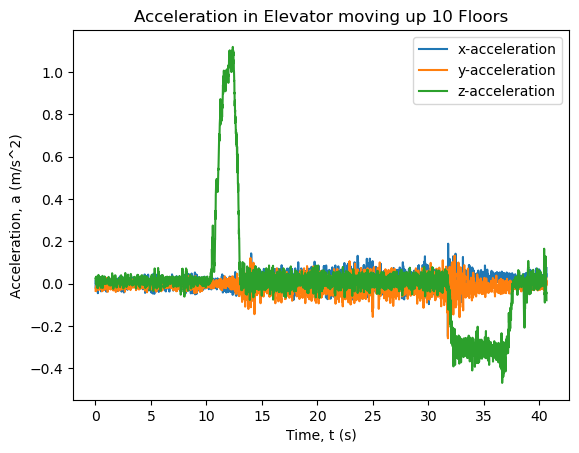

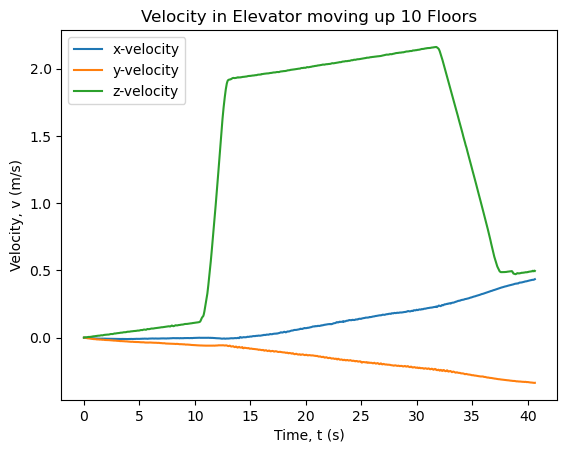

In [65]:
# Finding and plotting direction of motion (velocity) from acceleration data

#First extract the acceleration data:

# Time (seconds), x-accel (m/s^2), y-accel (m/s^2), z-accel (m/s^2), absolute accel (m/s^2)
t, a_x, a_y, a_z, a = np.loadtxt(
    '/workspaces/CP1-24-midterm/iglesias-cardinale/data/ic004_accel_elevator_up.csv' ,
    skiprows=1,
    delimiter = ',',
    unpack=True)

plt.plot(t, a_x, label = 'x-acceleration')
plt.plot(t, a_y, label = 'y-acceleration')
plt.plot(t, a_z, label = 'z-acceleration')
plt.xlabel('Time, t (s)')
plt.ylabel('Acceleration, a (m/s^2)')
plt.title('Acceleration in Elevator moving up 10 Floors')
plt.legend()
plt.show()

# Example usage
v_x = dm.velocity(t, a_x, 0)
v_y = dm.velocity(t, a_y, 0)
v_z = dm.velocity(t, a_z, 0)

# Plot the velocity components
plt.plot(t, v_x, label = 'x-velocity')
plt.plot(t, v_y, label = 'y-velocity')
plt.plot(t, v_z, label = 'z-velocity')
plt.xlabel('Time, t (s)')
plt.ylabel('Velocity, v (m/s)')
plt.title('Velocity in Elevator moving up 10 Floors')
plt.legend()
plt.show()


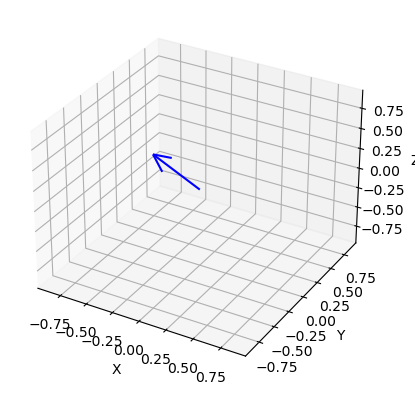

In [66]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

v_mag = np.sqrt(v_x[1]**2+v_y[1]**2+v_y[1]**2)
# Plot vectors using quiver
ax.quiver(0, 0, 0, v_x[1], v_y[1], v_z[1], color='b', length=1, normalize=True)
#ax.quiver(x2, y2, z2, v2[0], v2[1], v2[2], color='g', length=1, normalize=True)

# Label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

v = max(v_x[1], v_y[1], v_z[1])/v_mag
ax.set_xlim([-v, v])  # Set the range for x-axis
ax.set_ylim([-v, v])  # Set the range for y-axis
ax.set_zlim([-v, v])

plt.show()

In [67]:
dm.direction_of_motion(a_x,a_y,a_z,t,500,0)

TypeError: direction_of_motion() takes 5 positional arguments but 6 were given